In [1]:
import codecs
import re
import nltk
import itertools
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path = '../data/twitter.txt'
twitter_lines = codecs.open(path, 'r', encoding='utf-8', errors='ignore').read().split('\n')[:-1]

In [3]:
EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
def clean_text(lines):
    clean_lines = []
    for line in lines:
        line = line.lower()
        line = re.sub(r"i'm", "i am", line)
        line = re.sub(r"he's", "he is", line)
        line = re.sub(r"she's", "she is", line)
        line = re.sub(r"that's", "that is", line)
        line = re.sub(r"what's", "what is", line)
        line = re.sub(r"where's", "where is", line)
        line = re.sub(r"how's", "how is", line)
        line = re.sub(r"\'ll", " will", line)
        line = re.sub(r"\'ve", " have", line)
        line = re.sub(r"\'re", " are", line)
        line = re.sub(r"\'d", " would", line)
        line = re.sub(r"n't", " not", line)
        line = re.sub(r"won't", "will not", line)
        line = re.sub(r"can't", "cannot", line)
        line = EMOJI.sub(r'', line)
        line = re.sub(r"[-()\"#/%&$@;:<>*^_{}`+=~|.!?,]", "", line)
        line = " ".join(line.split())
        clean_lines.append(line)
    return clean_lines

In [4]:
MAX_LEN = 25
MIN_LEN = 2

filter_data = clean_text(twitter_lines)
filter_questions, filter_answers = [], []

for i in range(0, len(filter_data), 2):
    question_len = len(filter_data[i].split(' '))
    answer_len = len(filter_data[i+1].split(' '))
    if question_len >= MIN_LEN and question_len <= MAX_LEN:
        if answer_len >= MIN_LEN and answer_len <= MAX_LEN:
            filter_questions.append(filter_data[i])
            filter_answers.append(filter_data[i+1])

question_tokenized = [wordlist.split(' ') for wordlist in filter_questions]
answer_tokenized = [wordlist.split(' ') for wordlist in filter_answers]
tokenized = question_tokenized + answer_tokenized

frequent_dictionary = nltk.FreqDist(itertools.chain(*tokenized))
print(frequent_dictionary)

<FreqDist with 193340 samples and 8783597 outcomes>


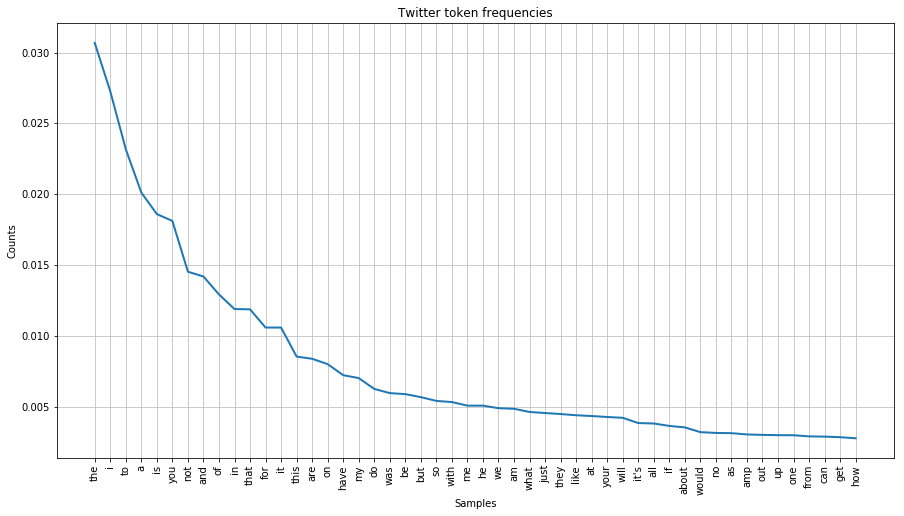

In [5]:
tmp = frequent_dictionary.copy()
norm = frequent_dictionary.N()

for key in tmp.keys():
    tmp[key] = float(frequent_dictionary[key]) / norm

plt.figure(figsize=(15, 8))
tmp.plot(50, cumulative=False, title="Twitter token frequencies")